In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visulaisation and EDA

In [6]:
# Load the dataset
data = pd.read_csv("Data.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [7]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [8]:
data.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


There is non-availability of data related to trades for every Stock before 2012. We have all values available for all stocks after 2012.

In [9]:
data = data[data.Date >= '2012-01-01']
data.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


No NULL values present henceforth

In [10]:
Tickers = data["Symbol"].unique().tolist()
print(Tickers)
print(f"Total Number of Stocks: {len(Tickers)}")

['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO', 'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL']
Total Number of Stocks: 51


There are stock data of 53 stocks present here. But since we are working on NIFTY_50 data, there should only have been 49 stocks (We dont have data on INFRATEL). There are 53 because name of 4 Tickers got changed between the time period of 2012-2021 hence we are receiving these extra 4 Symbols/Tickers. The changed ones are namely: MUNDRAPORT, UNIPHOS, SESAGOA, SSLT

MUNDRAPORT and UNIPHOS were changed due to rebranding of the companies and hence data under these tickers can be used as data under their new Tickers (ADANIPORT and UPL).

In cases like SESAGOA and SSLT, where the companies merged and became part of Vedanta Limited (VEDL), the business fundamentals might have changed. This means that historical data before the merger might not fully represent the current company's operations. So, data under these tickers should be ignored.

In [11]:
symbol_mapping = {
    'MUNDRAPORT': 'ADANIPORTS',
    'UNIPHOS': 'UPL',
}
data['Symbol'] = data['Symbol'].replace(symbol_mapping)
data = data[~data["Symbol"].isin(['SESAGOA', 'SSLT'])]

Tickers = data["Symbol"].unique().tolist()
print(Tickers)
print(f"Total Number of Stocks: {len(Tickers)}")

['ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO', 'UPL', 'VEDL']
Total Number of Stocks: 47


<ipython-input-11-58c8efc1a762>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Symbol'] = data['Symbol'].replace(symbol_mapping)


In [12]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, format='mixed')
data.index = data.Date
data = data.drop(columns=["Date"], axis=1)
data.head()

<ipython-input-12-520ccdc9ea4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, format='mixed')


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2012-01-02,ADANIPORTS,EQ,120.05,122.80,123.75,111.0,115.0,114.70,115.90,1572363,1.822399e+13,20505.0,408586.0,0.2599
2012-01-03,ADANIPORTS,EQ,114.70,117.50,120.90,115.0,119.6,120.30,118.97,1385662,1.648520e+13,17541.0,651310.0,0.4700
2012-01-04,ADANIPORTS,EQ,120.30,121.00,123.50,118.0,122.7,122.85,120.33,1259249,1.515310e+13,10912.0,722926.0,0.5741
2012-01-05,ADANIPORTS,EQ,122.85,122.00,127.60,121.3,127.0,126.70,125.30,788405,9.878425e+12,10614.0,315199.0,0.3998
2012-01-06,ADANIPORTS,EQ,126.70,126.25,128.75,124.3,127.0,127.70,126.44,1036623,1.310736e+13,11658.0,401367.0,0.3872


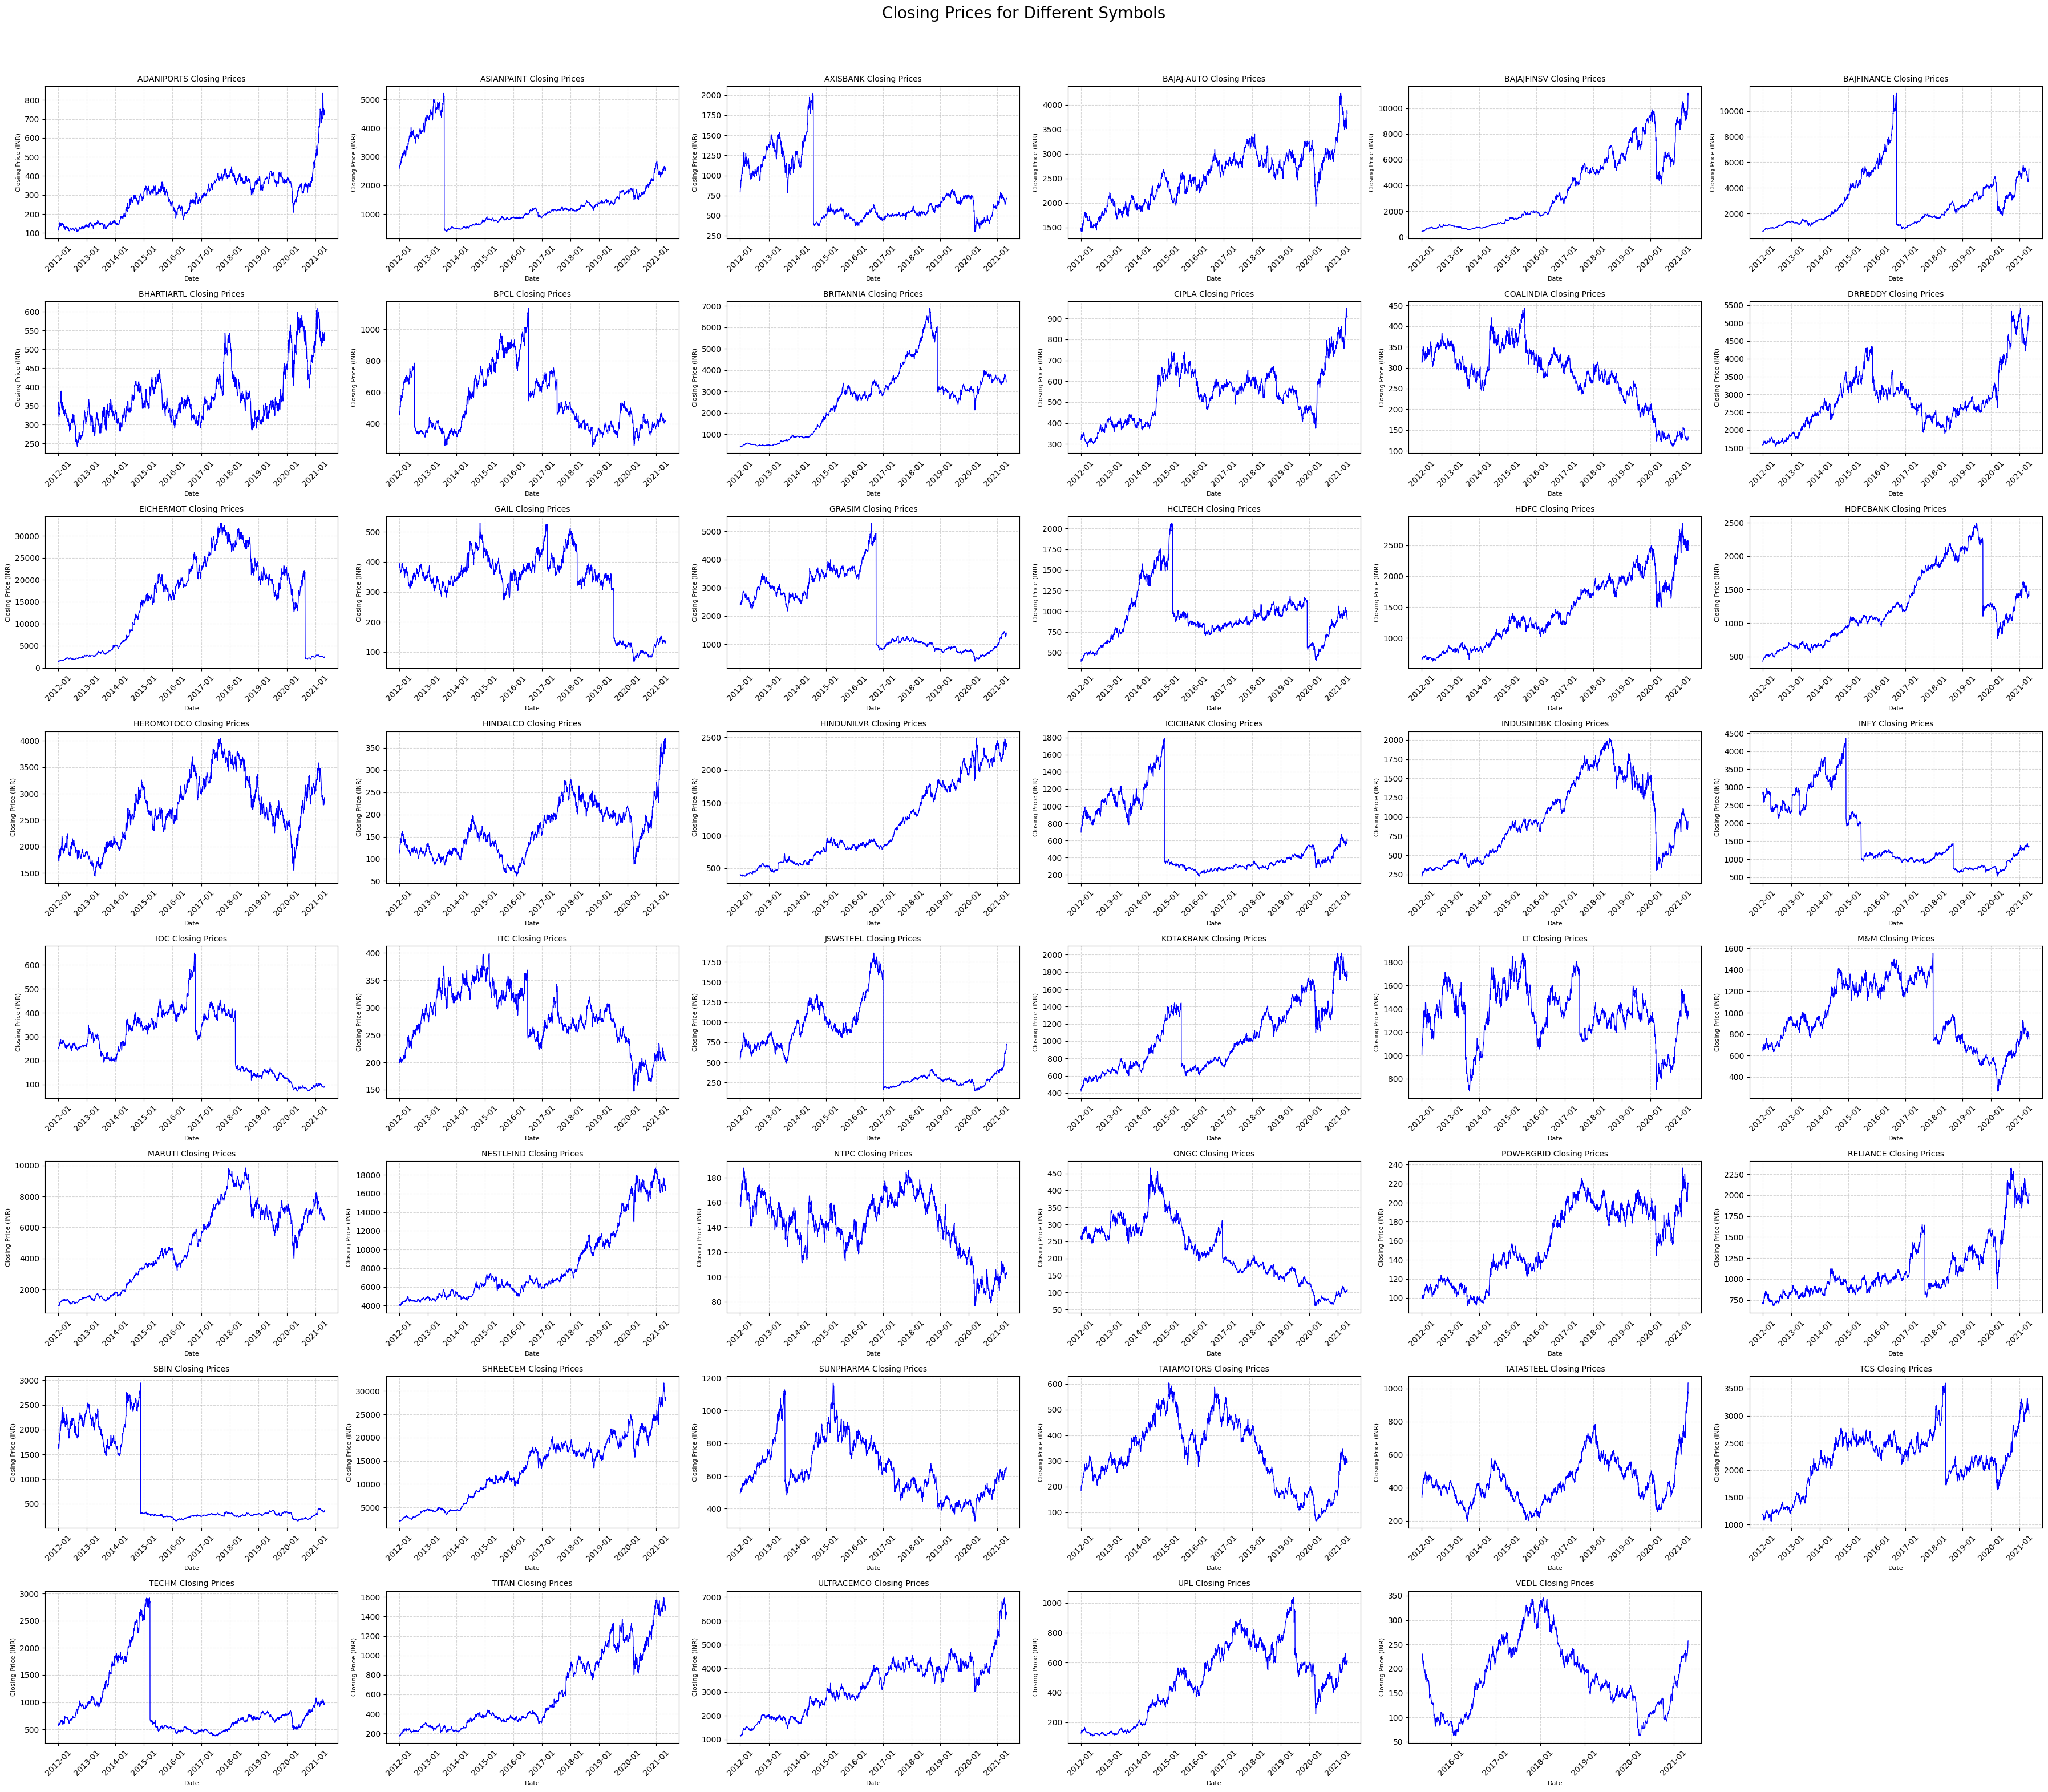

In [13]:
import math

# Number of symbols
num_symbols = len(Tickers)

# Set up the grid layout (3 columns)
rows = math.ceil(num_symbols / 6)
cols = 6

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(36, 4 * rows))
fig.suptitle('Closing Prices for Different Symbols', fontsize=20)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot closing prices for each symbol
for i, symbol in enumerate(Tickers):
    # Filter data for the current symbol
    symbol_data = data[data["Symbol"] == symbol]

    # Plot on the corresponding subplot
    axes[i].plot(symbol_data.index.tolist(), symbol_data["Close"], color='blue', linestyle='-', linewidth=1)

    # Adding titles and labels to the current subplot
    axes[i].set_title(f'{symbol} Closing Prices', fontsize=10)
    axes[i].set_xlabel('Date', fontsize=8)
    axes[i].set_ylabel('Closing Price (INR)', fontsize=8)

    # Rotate the x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

    # Format the x-axis date labels
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

    # Adding gridlines
    axes[i].grid(visible=True, linestyle='--', alpha=0.5)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()


Here it can be seen that there are trends in stock with a sudden decrease in close price. These happen due to external factors which we are not going to model here. So, we might need to have a different eda/ model for these trends than that of regular trends.

In [14]:
# Initialize dictionaries to store categorized symbols
stable_trend = []
sudden_changes = []

# Categorization thresholds
change_threshold = 0.3 # For sudden change detection

for symbol in Tickers:
    # Get the closing prices for the symbol
    symbol_data = data[data["Symbol"] == symbol]["Close"].values

    # Calculate percentage change
    percent_changes = np.diff(symbol_data) / symbol_data[:-1]

    # Detect sudden changes
    sudden_change_detected = np.any(np.abs(percent_changes) > change_threshold)

    # Categorize based on criteria
    if sudden_change_detected:
        sudden_changes.append(symbol)
    else:
        stable_trend.append(symbol)

# Output results
print("Stable Trend Symbols:", stable_trend)
print("Sudden Change Symbols:", sudden_changes)

Stable Trend Symbols: ['ADANIPORTS', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BHARTIARTL', 'CIPLA', 'COALINDIA', 'DRREDDY', 'HDFC', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'MARUTI', 'NESTLEIND', 'NTPC', 'POWERGRID', 'SHREECEM', 'TATAMOTORS', 'TATASTEEL', 'TITAN', 'ULTRACEMCO', 'VEDL']
Sudden Change Symbols: ['ASIANPAINT', 'AXISBANK', 'BAJFINANCE', 'BPCL', 'BRITANNIA', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'ONGC', 'RELIANCE', 'SBIN', 'SUNPHARMA', 'TCS', 'TECHM', 'UPL']


Here, we are going to perform EDA on one symbol of each trend intsead of a different sets of EDA for all Symbols assuming that all other symbols of same group will behave in similar fashion under EDA.

In [23]:
data_adaniports = data[data["Symbol"] == 'ADANIPORTS']
data_asianpaints = data[data["Symbol"] == 'ASIANPAINT']

print("ADANIPOTS:")
display(data_adaniports)
print("___________________________________________________________________________________",end='\n\n')
print("ASIANPAINT:")
display(data_asianpaints)

ADANIPOTS:


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2012-01-02,ADANIPORTS,EQ,120.05,122.80,123.75,111.00,115.0,114.70,115.90,1572363,1.822399e+13,20505.0,408586.0,0.2599
2012-01-03,ADANIPORTS,EQ,114.70,117.50,120.90,115.00,119.6,120.30,118.97,1385662,1.648520e+13,17541.0,651310.0,0.4700
2012-01-04,ADANIPORTS,EQ,120.30,121.00,123.50,118.00,122.7,122.85,120.33,1259249,1.515310e+13,10912.0,722926.0,0.5741
2012-01-05,ADANIPORTS,EQ,122.85,122.00,127.60,121.30,127.0,126.70,125.30,788405,9.878425e+12,10614.0,315199.0,0.3998
2012-01-06,ADANIPORTS,EQ,126.70,126.25,128.75,124.30,127.0,127.70,126.44,1036623,1.310736e+13,11658.0,401367.0,0.3872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079.0,0.0892
2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639.0,0.0865
2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353.0,0.1203


___________________________________________________________________________________

ASIANPAINT:


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2012-01-02,ASIANPAINT,EQ,2592.35,2560.00,2617.95,2560.00,2613.95,2590.30,2583.83,18245,4.714195e+12,2016.0,5021.0,0.2752
2012-01-03,ASIANPAINT,EQ,2590.30,2600.20,2660.00,2600.15,2660.00,2652.30,2636.25,17485,4.609479e+12,2762.0,6520.0,0.3729
2012-01-04,ASIANPAINT,EQ,2652.30,2619.05,2699.90,2619.05,2675.00,2674.95,2675.66,34186,9.147026e+12,3788.0,19796.0,0.5791
2012-01-05,ASIANPAINT,EQ,2674.95,2673.90,2690.95,2660.00,2680.00,2671.70,2672.22,71958,1.922879e+13,3406.0,63328.0,0.8801
2012-01-06,ASIANPAINT,EQ,2671.70,2648.05,2684.95,2645.10,2660.00,2660.60,2662.85,381554,1.016020e+14,6132.0,365872.0,0.9589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ASIANPAINT,EQ,2517.95,2530.00,2575.00,2530.00,2558.00,2557.90,2557.47,1103980,2.823400e+14,58557.0,335232.0,0.3037
2021-04-27,ASIANPAINT,EQ,2557.90,2545.00,2579.90,2534.00,2571.00,2574.35,2560.55,866331,2.218288e+14,66988.0,281178.0,0.3246
2021-04-28,ASIANPAINT,EQ,2574.35,2588.00,2620.25,2575.00,2612.00,2614.55,2605.91,1065561,2.776752e+14,52622.0,449241.0,0.4216


In [24]:
print("ADANIPORTS")
display(data_adaniports.info())
print("___________________________________________________________________________________",end='\n\n')
print("ASIANPAINT")
display(data_asianpaints.info())

ADANIPORTS
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2311 entries, 2012-01-02 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              2311 non-null   object 
 1   Series              2311 non-null   object 
 2   Prev Close          2311 non-null   float64
 3   Open                2311 non-null   float64
 4   High                2311 non-null   float64
 5   Low                 2311 non-null   float64
 6   Last                2311 non-null   float64
 7   Close               2311 non-null   float64
 8   VWAP                2311 non-null   float64
 9   Volume              2311 non-null   int64  
 10  Turnover            2311 non-null   float64
 11  Trades              2311 non-null   float64
 12  Deliverable Volume  2311 non-null   float64
 13  %Deliverble         2311 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 270.8+ KB


None

___________________________________________________________________________________

ASIANPAINT
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2311 entries, 2012-01-02 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              2311 non-null   object 
 1   Series              2311 non-null   object 
 2   Prev Close          2311 non-null   float64
 3   Open                2311 non-null   float64
 4   High                2311 non-null   float64
 5   Low                 2311 non-null   float64
 6   Last                2311 non-null   float64
 7   Close               2311 non-null   float64
 8   VWAP                2311 non-null   float64
 9   Volume              2311 non-null   int64  
 10  Turnover            2311 non-null   float64
 11  Trades              2311 non-null   float64
 12  Deliverable Volume  2311 non-null   float64
 13  %Deliverble         2311 non-null   flo

None

In [26]:
print("ADANIPORTS")
display(data_adaniports.describe())
print("___________________________________________________________________________________",end='\n\n')
print("ASIANPAINT")
display(data_asianpaints.describe())

ADANIPORTS


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2.311000e+03,2.311000e+03,2.311000e+03,2.311000e+03,2311.000000
mean,292.989139,293.558027,298.253721,288.273756,293.243250,293.253094,293.406794,3.895282e+06,1.396791e+14,4.693332e+04,1.557204e+06,0.438362
std,119.845717,120.247096,122.051061,118.152133,120.084791,120.136059,120.188392,4.521503e+06,3.022608e+14,5.109408e+04,1.439656e+06,0.161116
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.921800e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,186.225000,187.350000,190.725000,183.025000,186.450000,186.575000,186.770000,1.772452e+06,4.592122e+13,2.351100e+04,6.683330e+05,0.325000
50%,309.400000,309.900000,314.800000,304.000000,309.700000,309.550000,310.110000,2.830268e+06,8.685541e+13,3.777300e+04,1.163334e+06,0.438000
75%,370.575000,371.000000,375.700000,366.125000,370.575000,370.700000,371.290000,4.495152e+06,1.403083e+14,5.506200e+04,1.978114e+06,0.547450
max,835.550000,857.000000,885.000000,817.050000,849.850000,835.550000,835.160000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.908800


___________________________________________________________________________________

ASIANPAINT


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2.311000e+03,2.311000e+03,2311.000000,2.311000e+03,2311.000000
mean,1671.310255,1671.158762,1691.251579,1651.965772,1671.339269,1671.286045,1671.514561,1.123027e+06,1.527904e+14,43511.974903,5.365325e+05,0.506354
std,1187.525557,1185.789965,1200.666608,1174.535341,1187.597208,1187.507341,1187.704849,1.000193e+06,1.877305e+14,36476.307186,4.714082e+05,0.136485
min,392.000000,389.700000,402.850000,373.400000,389.300000,392.000000,386.520000,6.240000e+02,1.661499e+11,70.000000,2.790000e+02,0.076800
25%,862.175000,864.150000,874.700000,852.925000,863.125000,862.175000,863.540000,5.315895e+05,4.921239e+13,19452.000000,2.458300e+05,0.417500
50%,1200.400000,1200.250000,1213.700000,1184.000000,1197.700000,1200.400000,1199.340000,9.208750e+05,9.063455e+13,34225.000000,4.500060e+05,0.507500
75%,1875.975000,1878.950000,1893.125000,1856.050000,1877.450000,1875.975000,1874.565000,1.460852e+06,1.703861e+14,56609.000000,7.306480e+05,0.597450
max,5213.100000,5221.100000,5247.750000,5150.050000,5221.100000,5213.100000,5175.790000,1.154594e+07,2.216650e+15,351347.000000,7.938427e+06,0.958900


In [27]:
print("ADANIPORTS")
display(data_adaniports.isnull().sum())
print("___________________________________________________________________________________",end='\n\n')
print("ASIANPAINT")
display(data_asianpaints.isnull().sum())

ADANIPORTS


,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0
Volume,0


___________________________________________________________________________________

ASIANPAINT


,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0
Volume,0


<ipython-input-28-507b319b0ba3>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for subplots


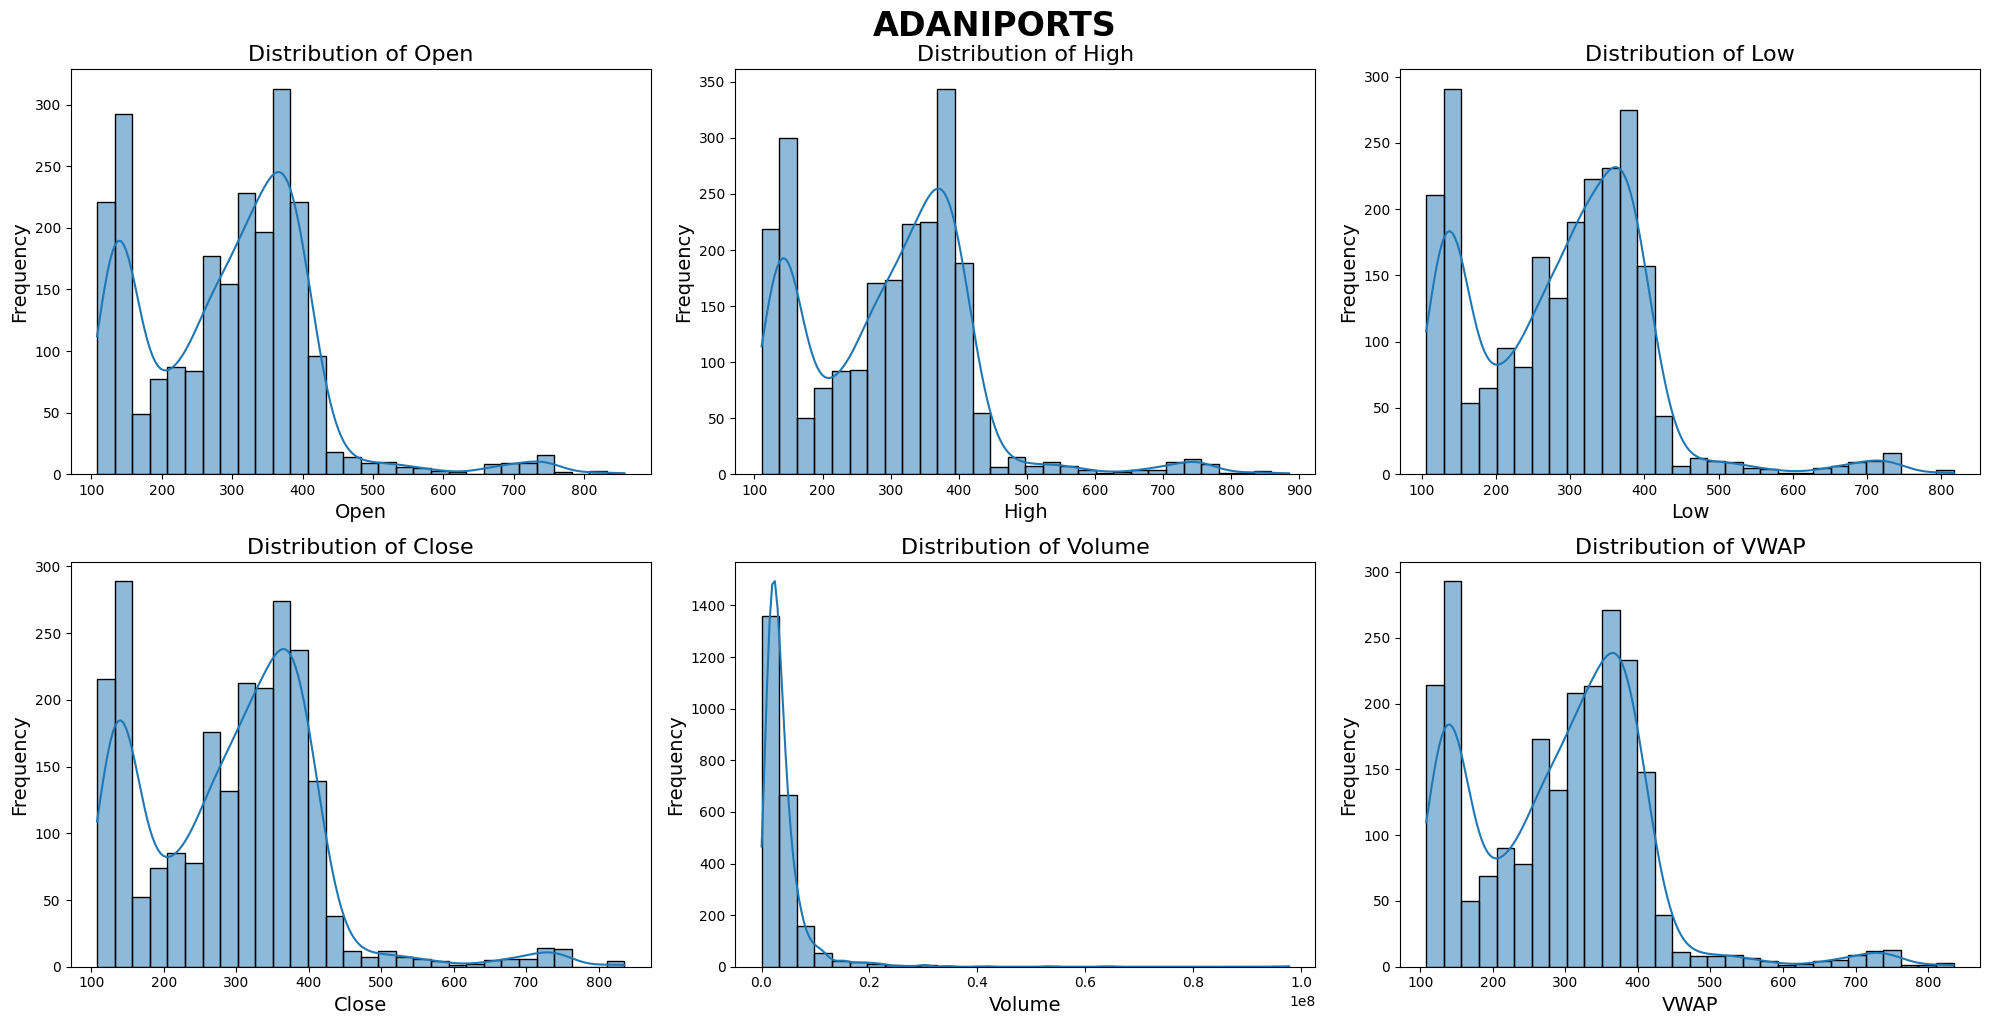

In [28]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']

plt.subplots(figsize=(20, 10))

# Looping through the features to create subplots
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for subplots
    sns.histplot(data_adaniports[col], kde=True, bins=30)  # Using histplot with KDE
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()  # Adjust the layout for better fit
plt.suptitle('ADANIPORTS', fontsize=24, fontweight='bold', y=1.05)  # Add a bigger title
plt.show()

<ipython-input-29-ffe473ce26e6>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for subplots


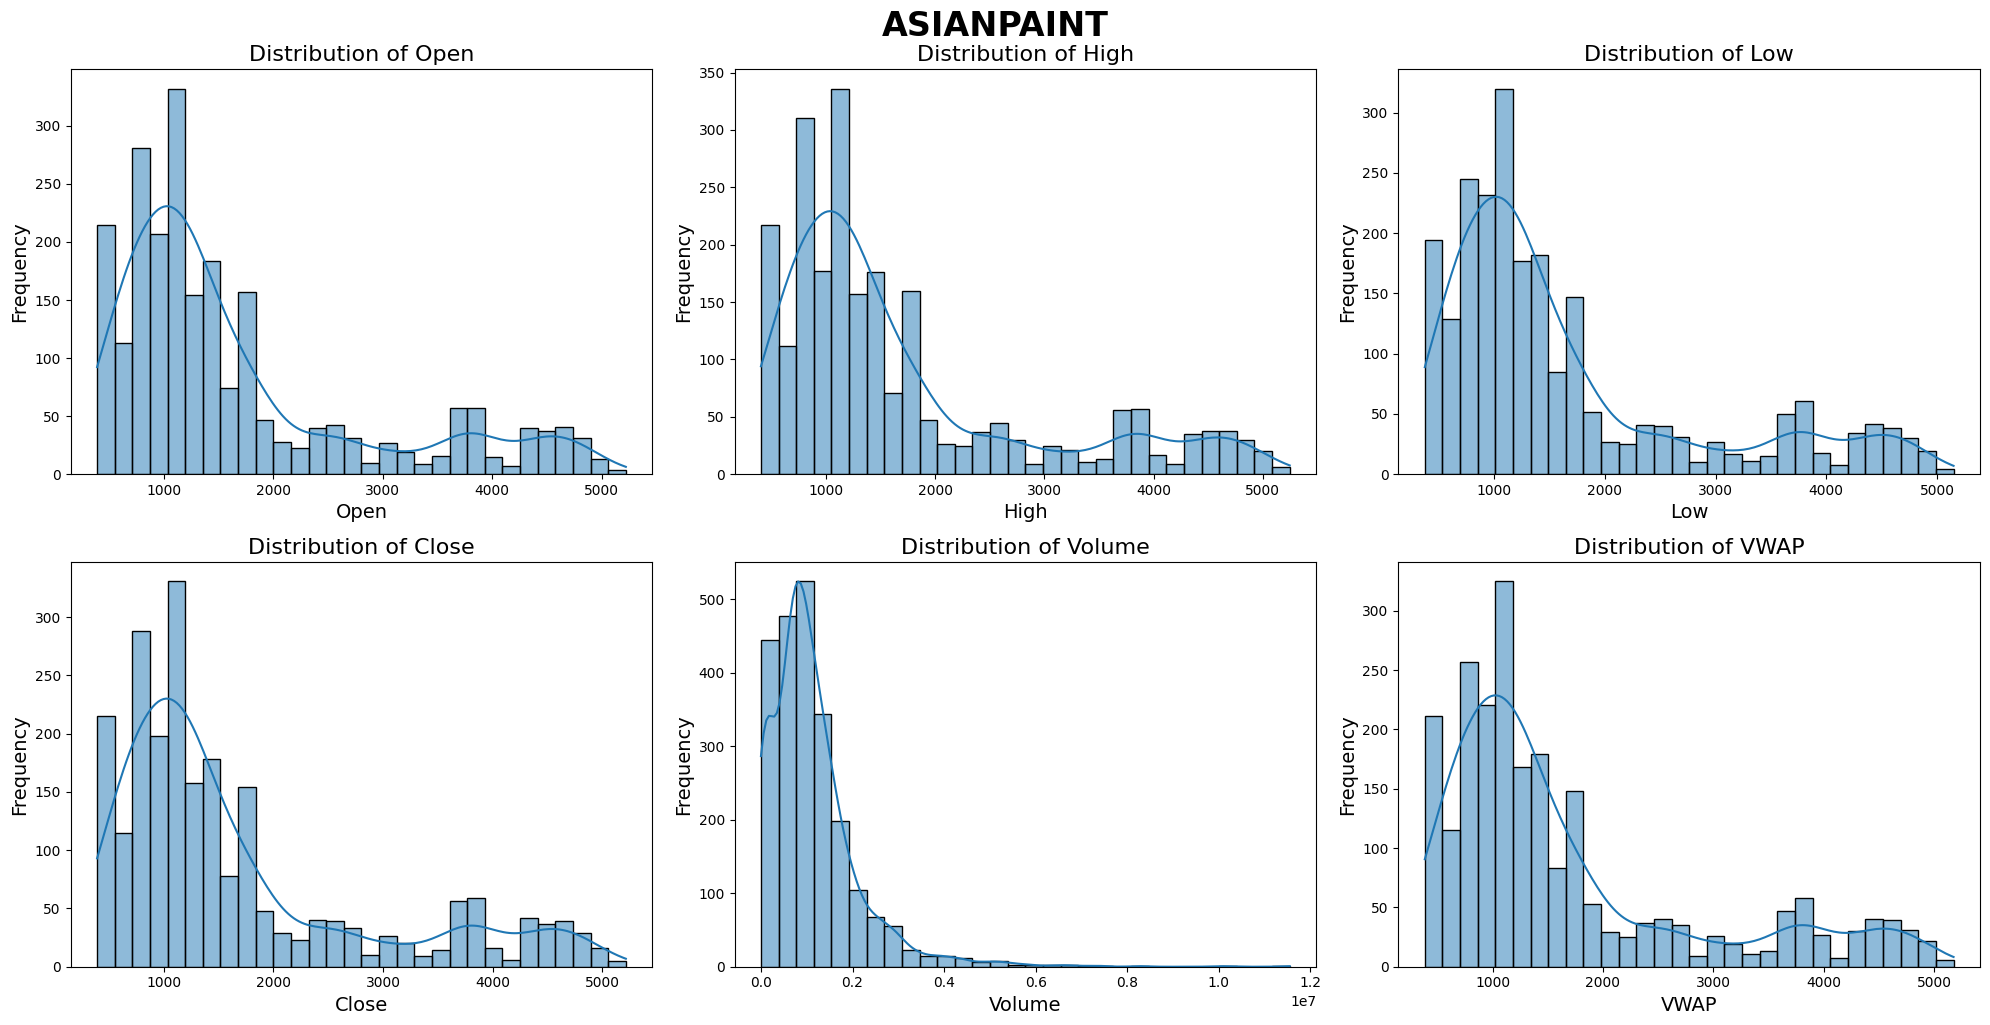

In [29]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']

plt.subplots(figsize=(20, 10))

# Looping through the features to create subplots
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for subplots
    sns.histplot(data_asianpaints[col], kde=True, bins=30)  # Using histplot with KDE
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()  # Adjust the layout for better fit
plt.suptitle('ASIANPAINT', fontsize=24, fontweight='bold', y=1.05)  # Add a bigger title
plt.show()

<ipython-input-34-4d5c8afbdc2c>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for subplots


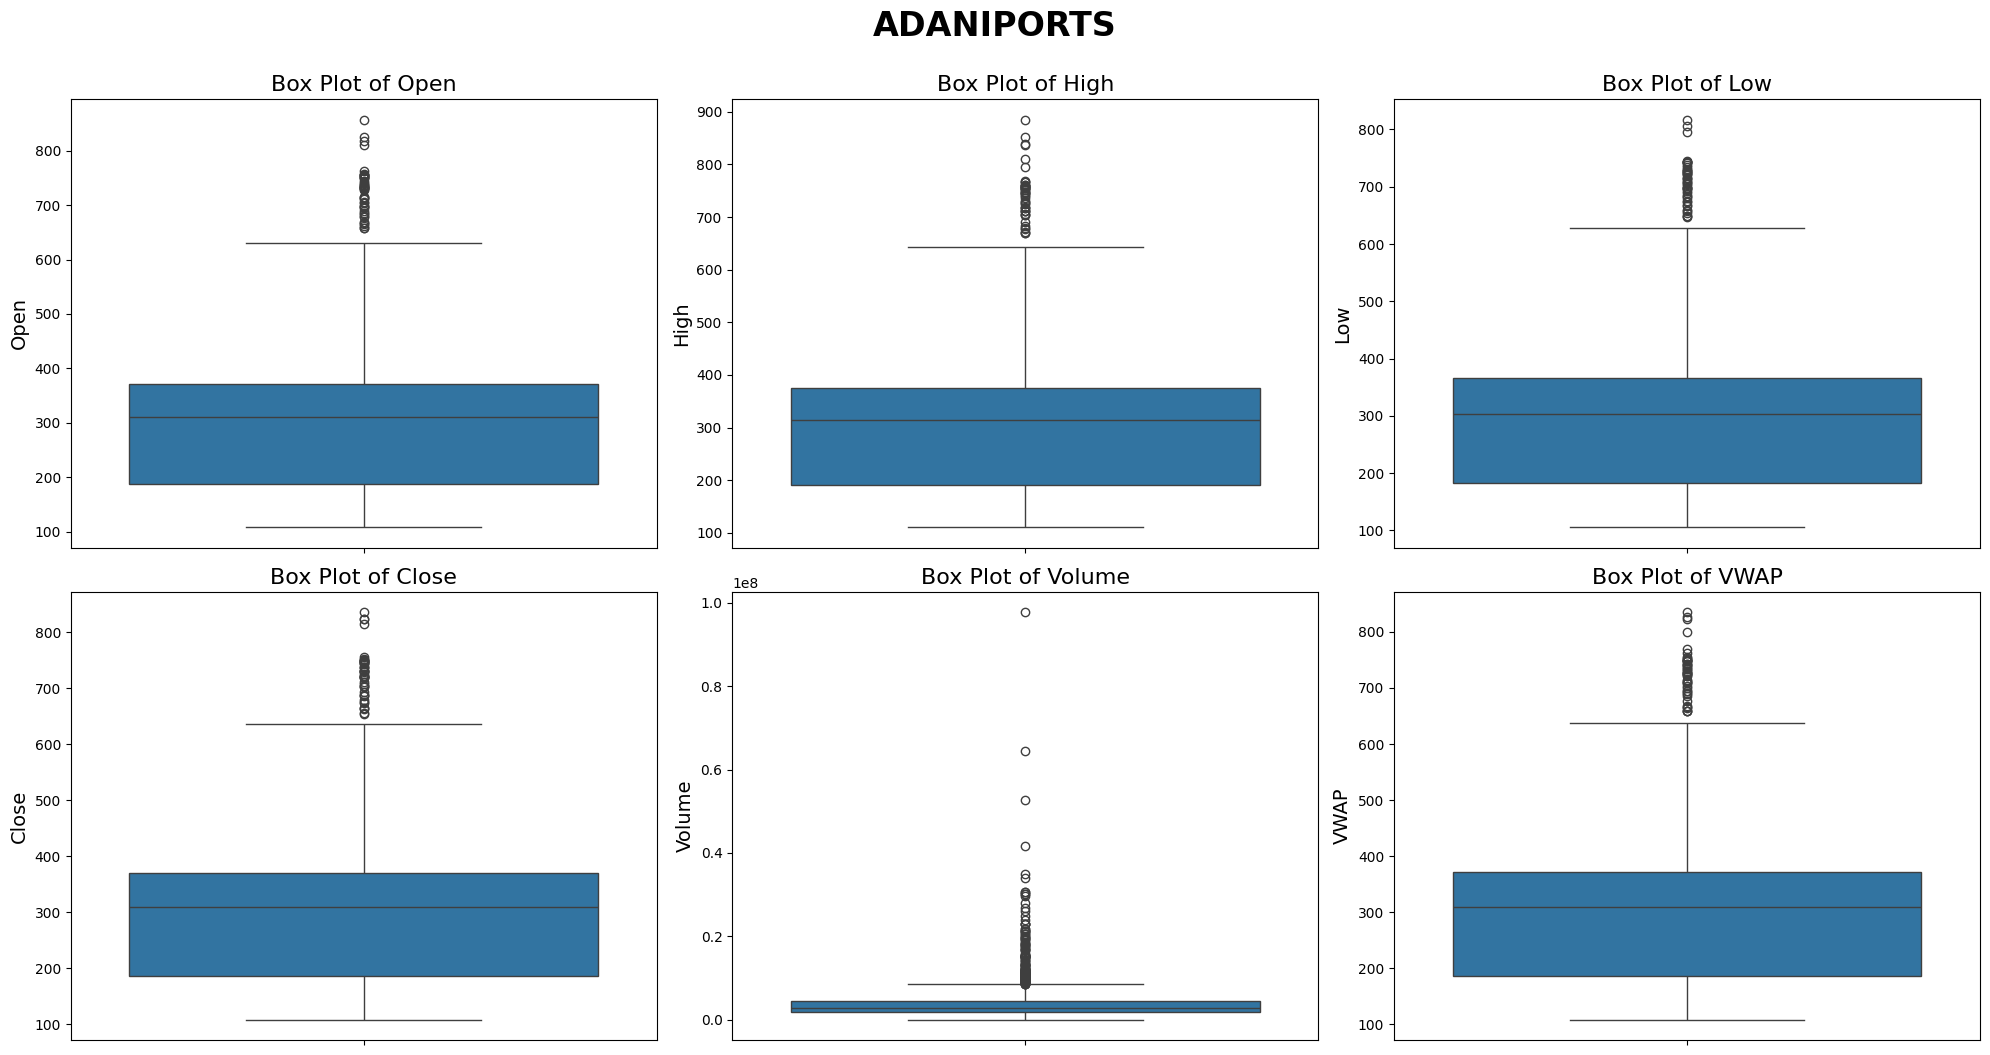

In [34]:
plt.subplots(figsize=(20, 10))

# Looping through the features to create subplots
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for subplots
    sns.boxplot(y=data_adaniports[col])  # Use y parameter to specify data
    plt.title(f'Box Plot of {col}', fontsize=16)
    plt.ylabel(col, fontsize=14)

plt.tight_layout()  # Adjust the layout for better fit
plt.suptitle('ADANIPORTS', fontsize=24, fontweight='bold', y=1.05)  # Add a bigger title
plt.show()

<ipython-input-35-958e21e0d648>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for subplots


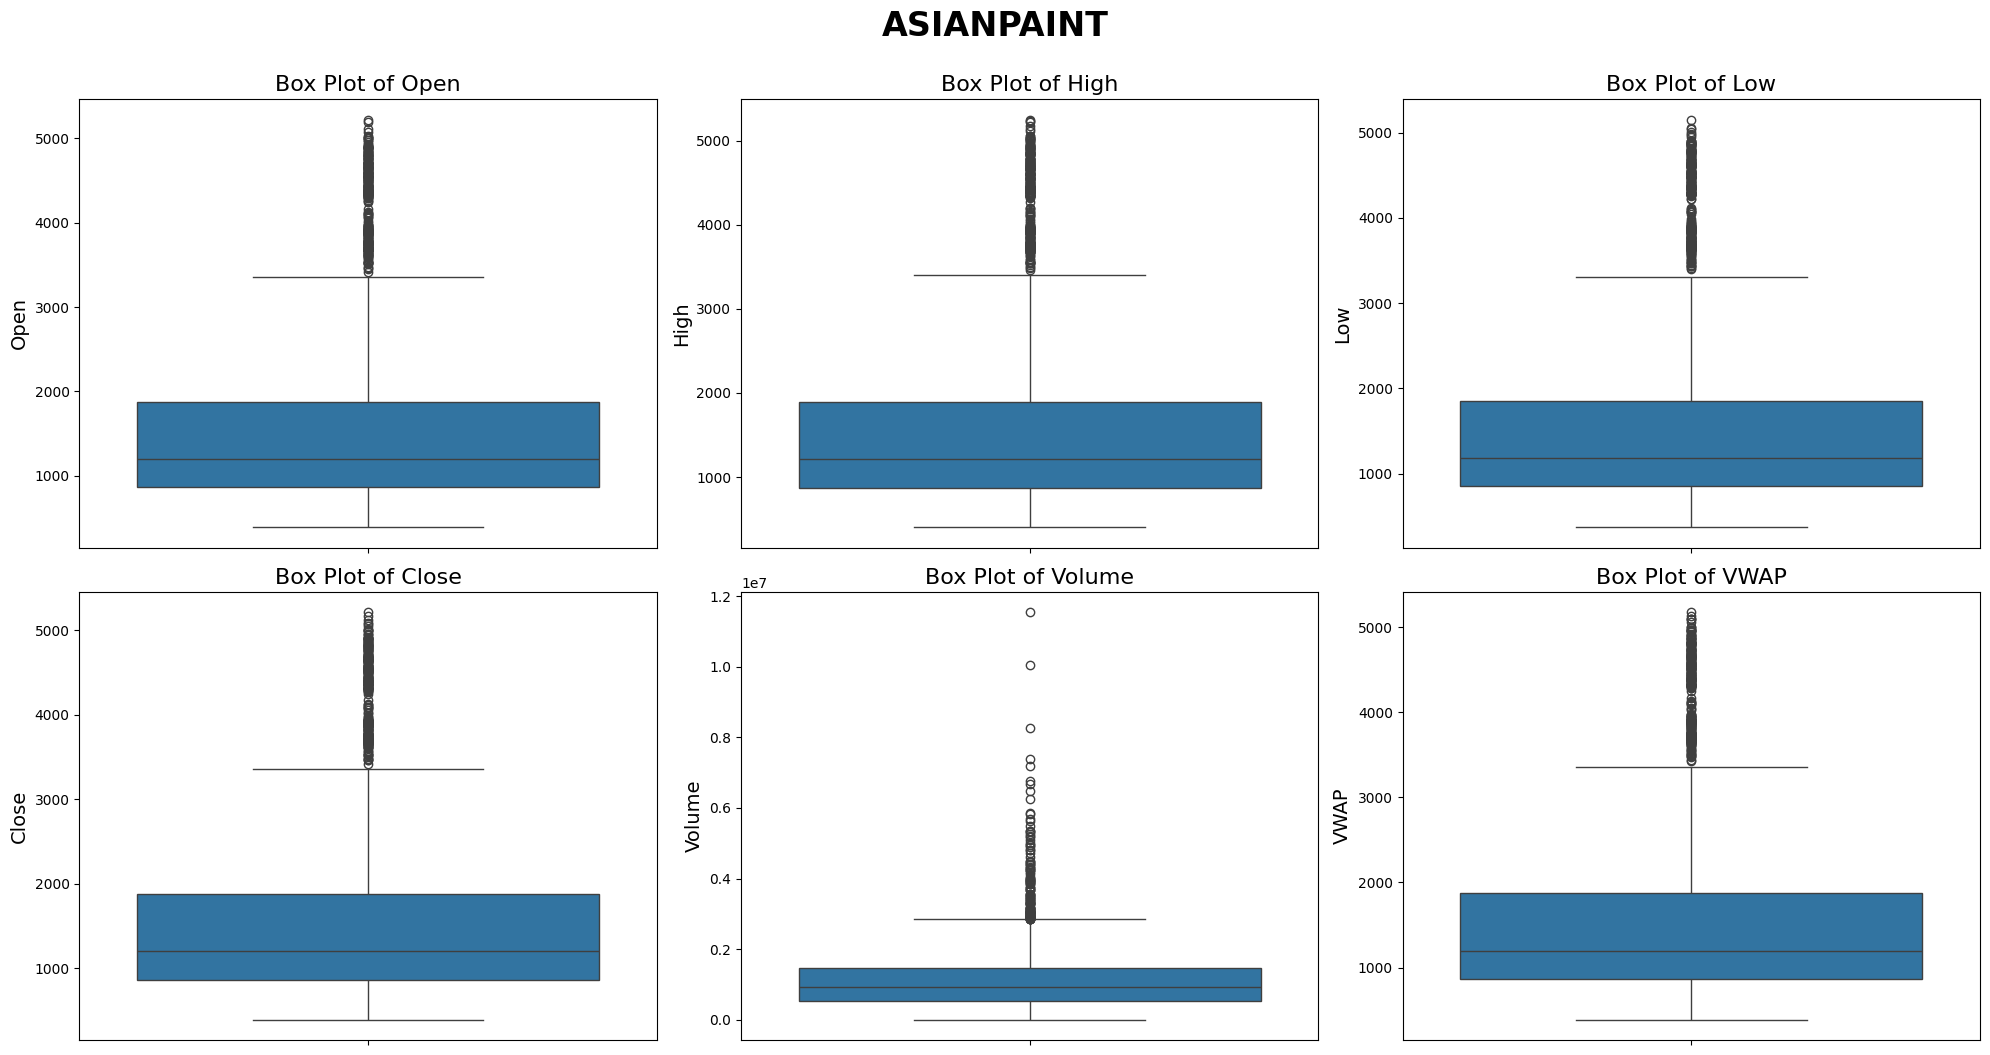

In [35]:
plt.subplots(figsize=(20, 10))

# Looping through the features to create subplots
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for subplots
    sns.boxplot(y=data_asianpaints[col])  # Use y parameter to specify data
    plt.title(f'Box Plot of {col}', fontsize=16)
    plt.ylabel(col, fontsize=14)

plt.tight_layout()  # Adjust the layout for better fit
plt.suptitle('ASIANPAINT', fontsize=24, fontweight='bold', y=1.05)  # Add a bigger title
plt.show()